In [1]:
from ipyleaflet import Map, DrawControl
from ipywidgets import Label
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="application")
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
center = (51.5074, -0.1278)  # Coordinates for London
zoom = 10  # Initial zoom level

m = Map(center=center, zoom=zoom)


In [3]:
draw_control = DrawControl(
    rectangle_options={'shapeOptions': {'color': '#FF0000'}}
)
m.add_control(draw_control)


In [4]:
def get_district_name(latitude, longitude):
    location = geolocator.reverse((latitude, longitude), exactly_one=True)
    address = location.raw['address']
    district = address.get('county', '') or address.get('city', '') or address.get('town', '')
    return district

In [5]:
get_district_name(0, 0)

''

In [6]:
label = Label(value="")
name = ""

def handle_draw(self, action, geo_json):
    if action == 'created' and geo_json['geometry']['type'] == 'Polygon':
        coordinates = geo_json['geometry']['coordinates'][0]
        rectangle = {
            'min_lon': min(lon for lon, _ in coordinates),
            'min_lat': min(lat for _, lat in coordinates),
            'max_lon': max(lon for lon, _ in coordinates),
            'max_lat': max(lat for _, lat in coordinates),
        }
        label.value = f"Rectangle: {rectangle}"
        location_name = get_district_name(rectangle['min_lat'], rectangle['min_lon'])
        print(location_name)
        label.value = location_name
        name = location_name


draw_control.on_draw(handle_draw)


In [7]:
display(m)
display(label)


Map(center=[51.5074, -0.1278], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Label(value='')

In [8]:


# Load the CSV data
data = pd.read_csv('pre_final.csv')

# Filter the data based on district and mandal
district = 'Adilabad'
mandal = 'Adilabad Rural'
filtered_data = data[(data['District'] == district) & (data['Mandal'] == mandal)]

# Convert the 'Date' column to datetime format
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

# Sort the data by date
filtered_data = filtered_data.sort_values(by='Date')


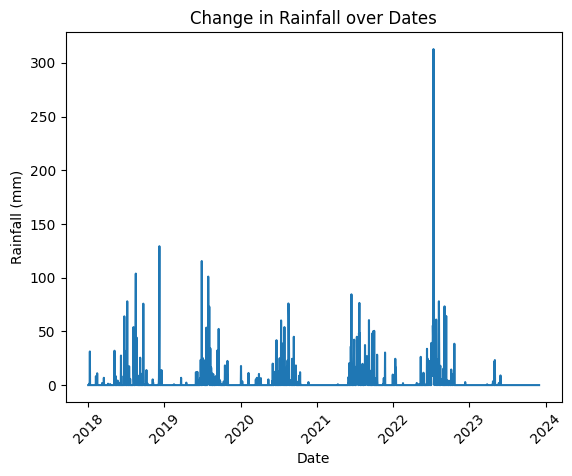

In [9]:

# Plotting the change in rainfall over dates
plt.plot(filtered_data['Date'], filtered_data['Rainfall (mm)'])
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Change in Rainfall over Dates')
plt.xticks(rotation=45)
plt.show()


In [10]:

# Prepare the data for future rainfall prediction
X = pd.to_numeric(filtered_data['Date']).values.reshape(-1, 1)
y = filtered_data['Rainfall (mm)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Create and train the model
model = RandomForestRegressor(n_estimators = 10)  # Use RandomForestRegressor for regression tasks
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10)

In [11]:

# Predict future rainfall
future_dates = pd.date_range(start='2023-07-05', periods=5, freq='D')  # Adjust the future date range as needed
future_dates_numeric = pd.to_numeric(future_dates).values.reshape(-1, 1)
future_rainfall = model.predict(future_dates_numeric)

# Display the predicted future rainfall
future_data = pd.DataFrame({'Date': future_dates, 'Rainfall (mm)': future_rainfall})
print('Predicted Future Rainfall:')
print(future_data)


Predicted Future Rainfall:
        Date  Rainfall (mm)
0 2023-07-07            0.0
1 2023-07-08            0.0
2 2023-07-09            0.0
3 2023-07-10            0.0
4 2023-07-11            0.0
